#<b>MINI-PROJECT
  
### Name: Shravani Pidurkar  
### PRN : 202201070027   

### Name: Shravani Ingle   
### PRN : 202201070028  
  
### Dataset Link : https://drive.google.com/file/d/1vw6Av3dk541UJfPAMdES7zQeIBcdkyuR/view?usp=drivesdk

### Repository Link : https://github.com/shravanipidurkar/Customer-Churn-Prediction.git

## Step 1: Import Required Libraries

In [6]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Preprocessing Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Machine Learning Models
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report, confusion_matrix, roc_curve, auc

# Warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the Dataset

In [7]:
# Load the dataset
df = pd.read_csv('/content/churn-bigml-20.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Show first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 

In [8]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [9]:
# Check duplicate values
df.duplicated().sum()

0

In [10]:
df.dtypes

,0
State,object
Account length,int64
Area code,int64
International plan,object
Voice mail plan,object
Number vmail messages,int64
Total day minutes,float64
Total day calls,int64
Total day charge,float64
Total eve minutes,float64


## Step 3: Exploratory Data Analysis (EDA)

<Axes: >

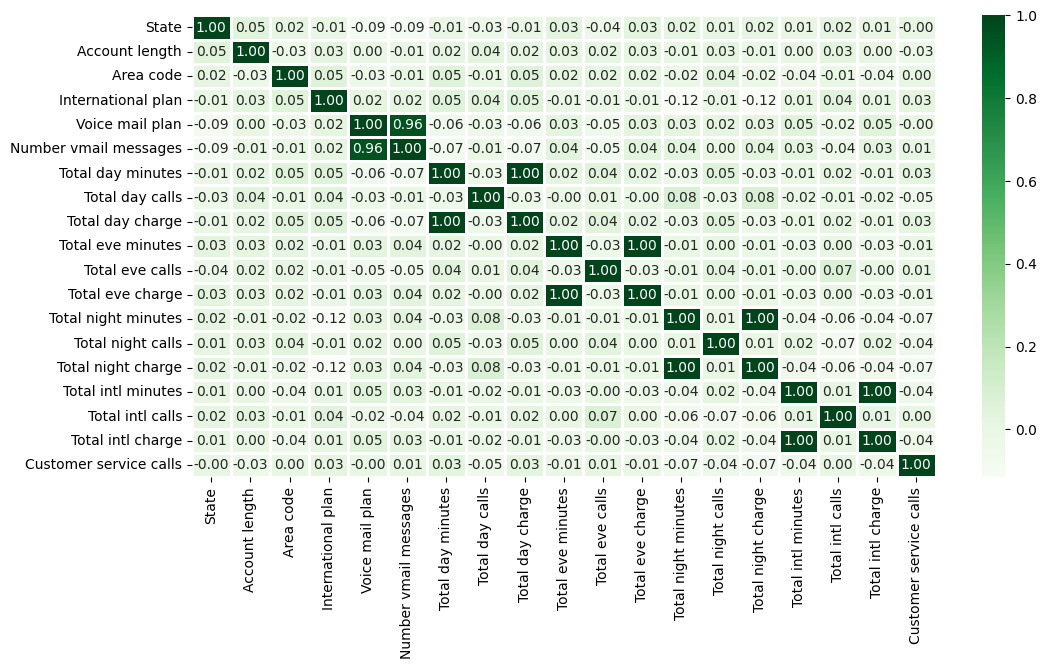

In [29]:
non_numeric_cols = df.select_dtypes(exclude=np.number).columns

# Exclude these non-numeric columns from the correlation calculation.
plt.figure(figsize=(12, 6))
sns.heatmap(df.drop(columns=non_numeric_cols).corr(),
            cmap='Greens',
            fmt='.2f',
            linewidths=2,
            annot=True)

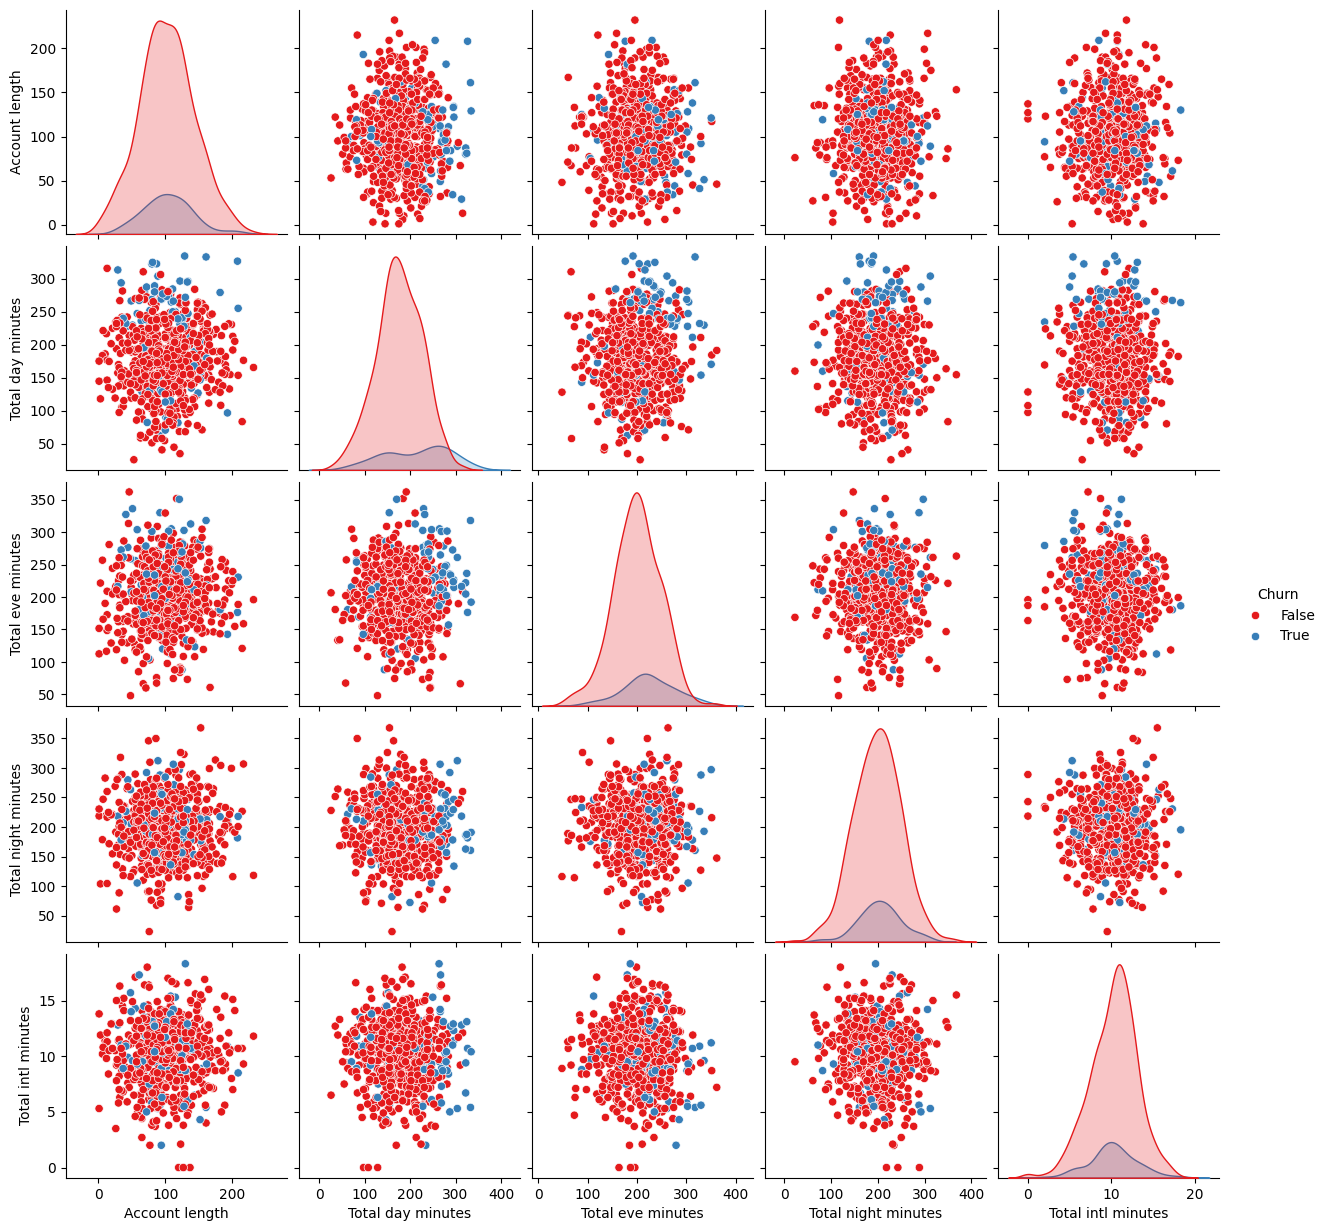

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt

# Pairplot for numeric features colored by 'Churn'
sb.pairplot(df, hue='Churn', vars=['Account length', 'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes'], palette='Set1')
plt.show()


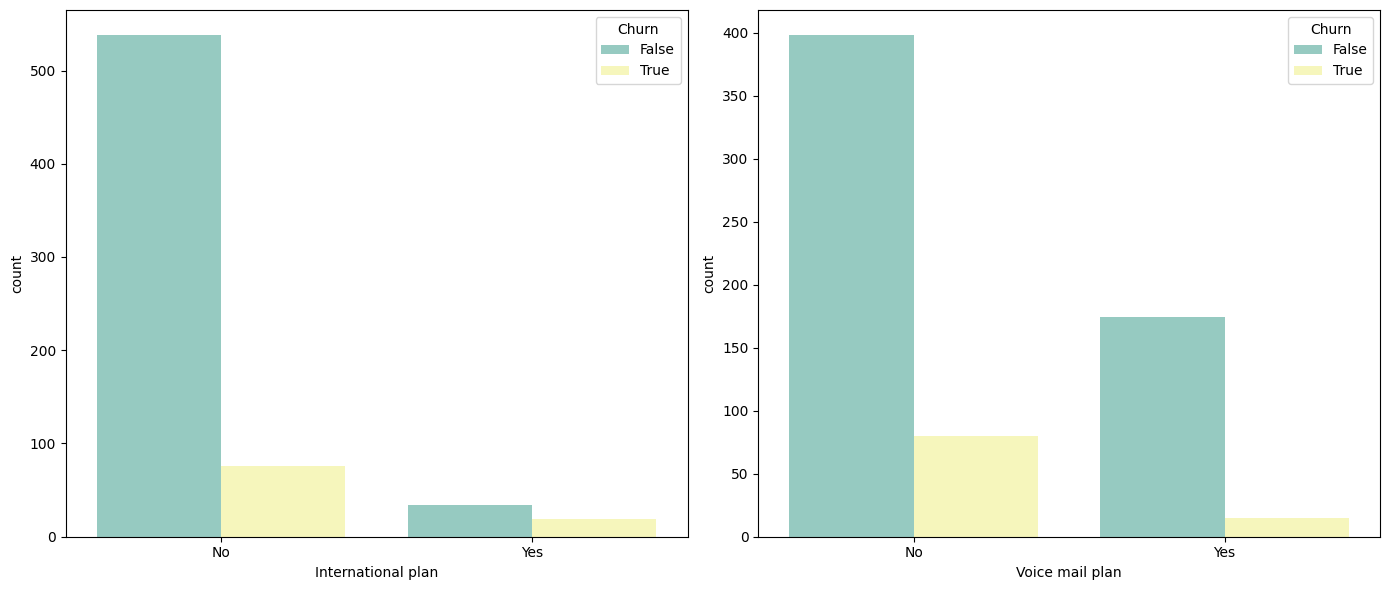

In [ ]:
# Countplot for categorical features vs Churn
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sb.countplot(data=df, x="International plan", hue="Churn", ax=axes[0], palette="Set3")
sb.countplot(data=df, x="Voice mail plan", hue="Churn", ax=axes[1], palette="Set3")

plt.tight_layout()
plt.show()


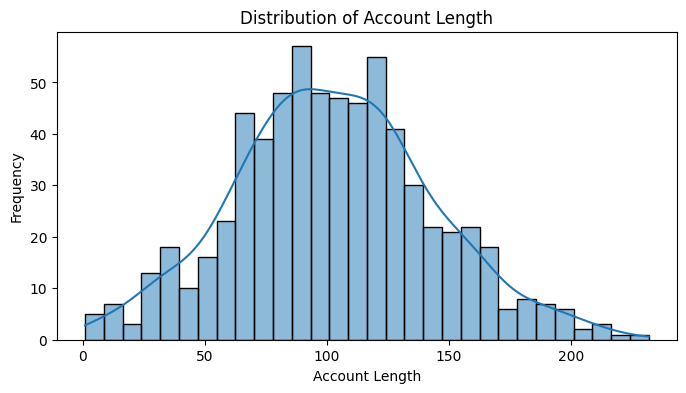

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Account length'], kde=True, bins=30)
plt.title("Distribution of Account Length")
plt.xlabel("Account Length")
plt.ylabel("Frequency")
plt.show()



In [ ]:
df['Churn'].value_counts()


,count
Churn,
False,572
True,95


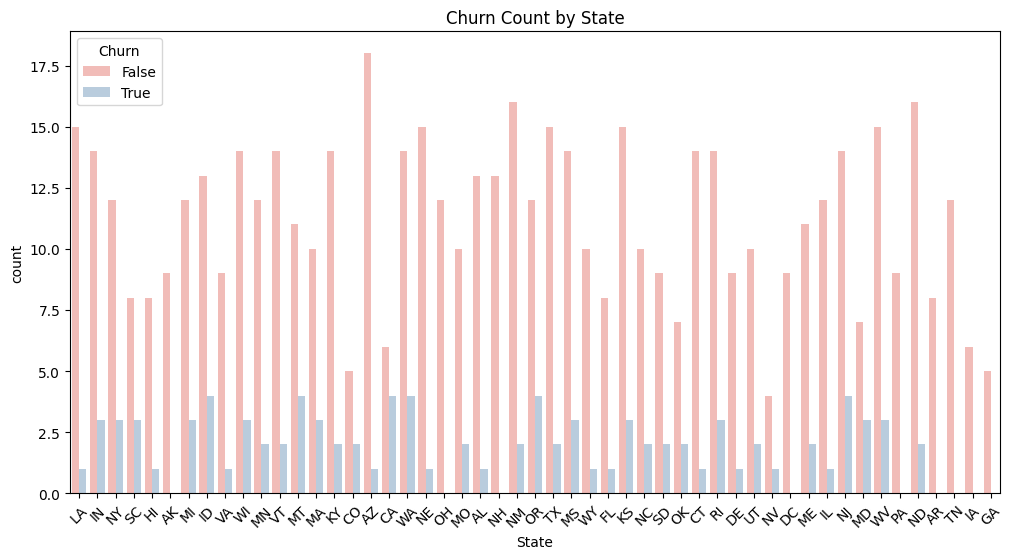

In [ ]:
# Barplot to show Churn by State
plt.figure(figsize=(12, 6))
sb.countplot(data=df, x="State", hue="Churn", palette="Pastel1")
plt.title('Churn Count by State')
plt.xticks(rotation=45)
plt.show()


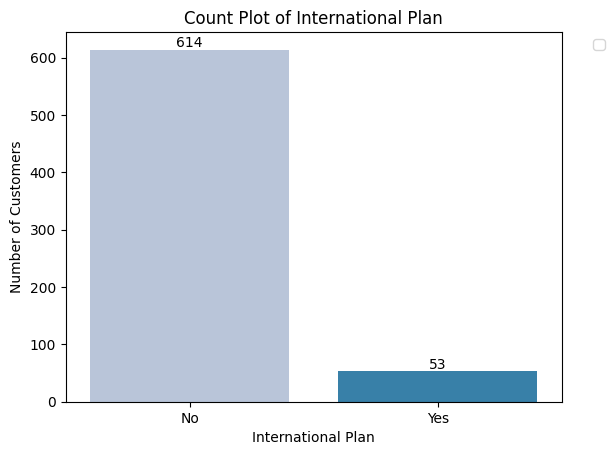

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for 'International plan'
ax = sns.countplot(x='International plan', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count Plot of International Plan')
plt.ylabel('Number of Customers')
plt.xlabel('International Plan')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


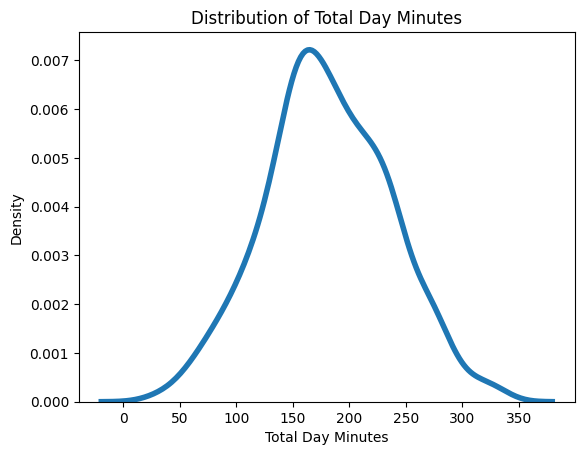

In [ ]:
sns.kdeplot(df['Total day minutes'], linewidth=4)
plt.title('Distribution of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Density')
plt.show()


In [ ]:
df['State'].value_counts()


,count
State,
AZ,19
ND,18
WV,18
NJ,18
KS,18
NM,18
WA,18
RI,17
ID,17


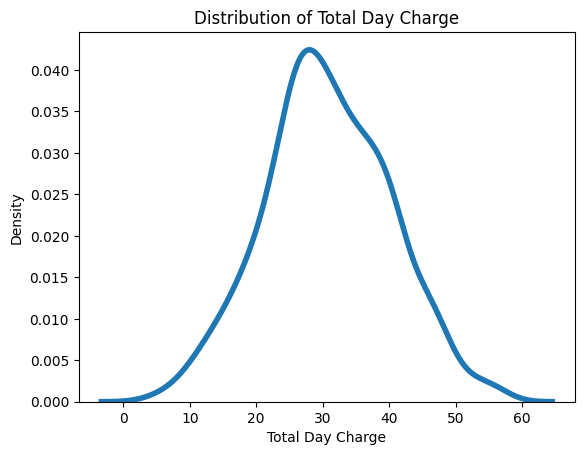

In [ ]:
sns.kdeplot(df['Total day charge'], linewidth=4)
plt.title('Distribution of Total Day Charge')
plt.xlabel('Total Day Charge')
plt.ylabel('Density')
plt.show()


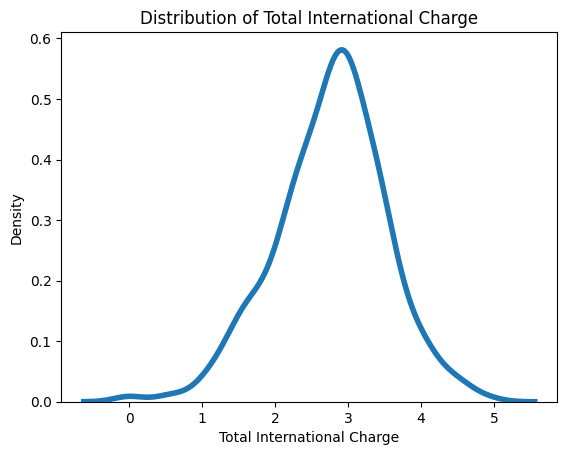

In [ ]:
sns.kdeplot(df['Total intl charge'], linewidth=4)
plt.title('Distribution of Total International Charge')
plt.xlabel('Total International Charge')
plt.ylabel('Density')
plt.show()


In [ ]:
df['State'].value_counts()


,count
State,
AZ,19
ND,18
WV,18
NJ,18
KS,18
NM,18
WA,18
RI,17
ID,17


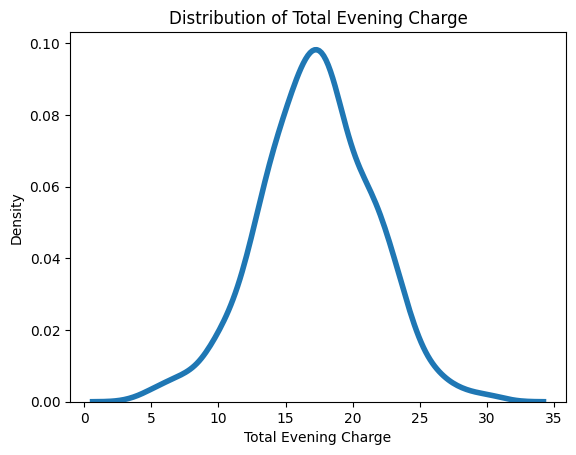

In [ ]:
sns.kdeplot(df['Total eve charge'], linewidth=4)
plt.title('Distribution of Total Evening Charge')
plt.xlabel('Total Evening Charge')
plt.ylabel('Density')
plt.show()


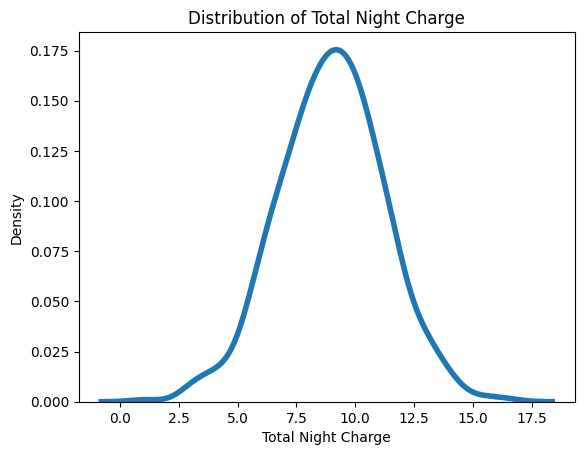

In [ ]:
sns.kdeplot(df['Total night charge'], linewidth=4)
plt.title('Distribution of Total Night Charge')
plt.xlabel('Total Night Charge')
plt.ylabel('Density')
plt.show()


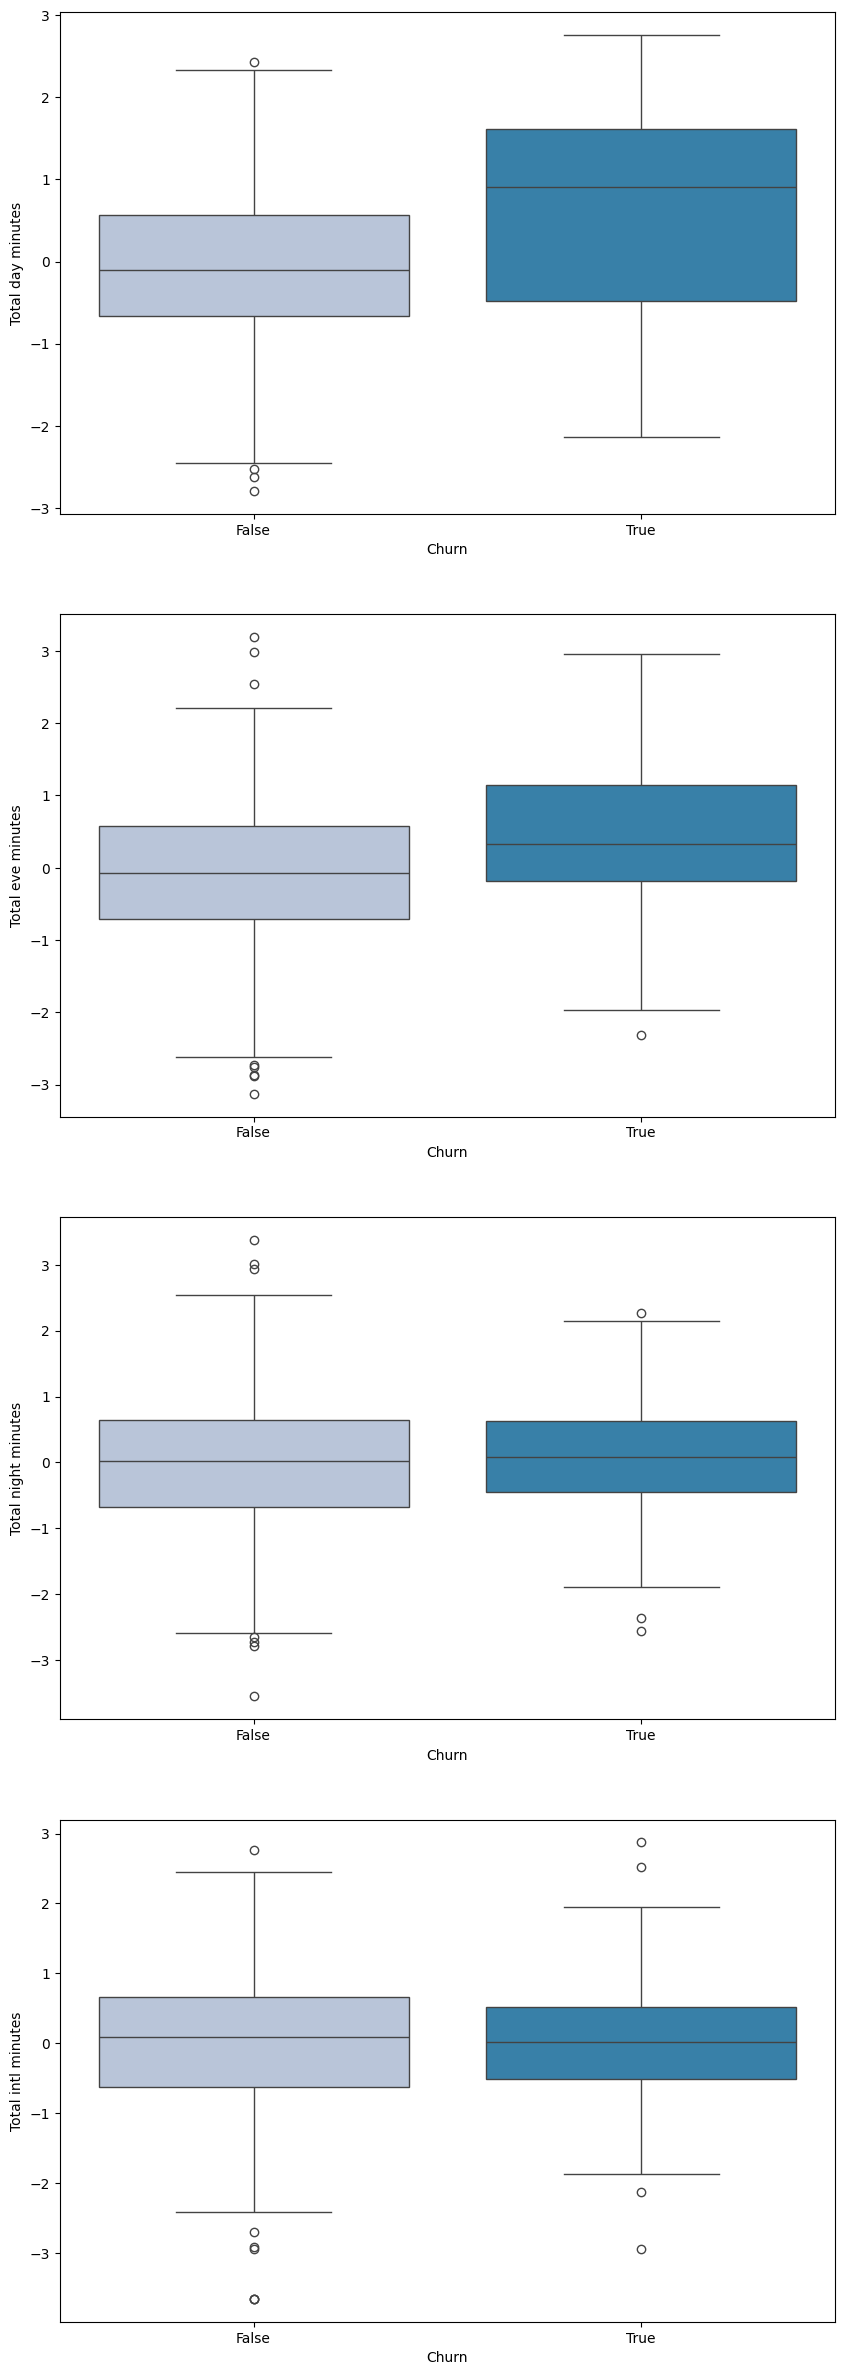

In [46]:
import matplotlib.pyplot as plt
import seaborn as sb

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=1)
fig.set_size_inches(10, 30)

# Plot boxplots for various numeric features against 'Churn'
sb.boxplot(data=df, y="Total day minutes", x="Churn", orient="v", ax=axes[0], palette="PuBu")
sb.boxplot(data=df, y="Total eve minutes", x="Churn", orient="v", ax=axes[1], palette="PuBu")
sb.boxplot(data=df, y="Total night minutes", x="Churn", orient="v", ax=axes[2], palette="PuBu")
sb.boxplot(data=df, y="Total intl minutes", x="Churn", orient="v", ax=axes[3], palette="PuBu")

# Display the plots
plt.show()


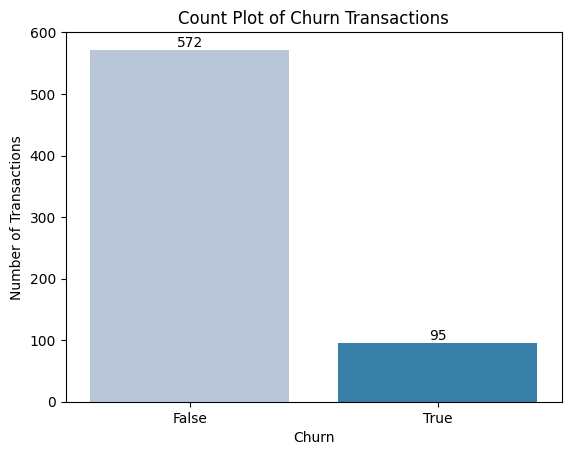

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for 'Churn'
ax = sns.countplot(x='Churn', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count Plot of Churn Transactions')
plt.ylabel('Number of Transactions')
plt.show()

# Delete the axis object if needed
del ax


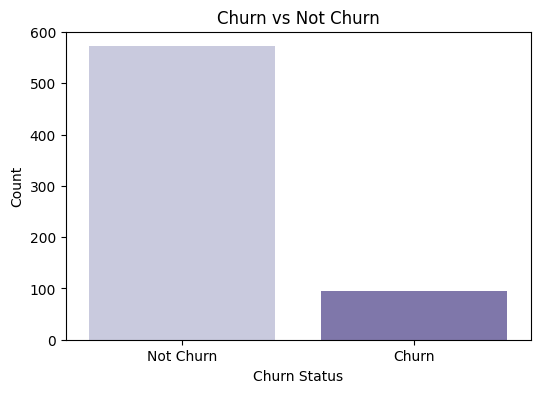

In [47]:
# Bar plot for Churn vs Not Churn
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='Purples')
plt.title('Churn vs Not Churn')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Churn', 'Churn'])
plt.show()


# BIVARIATE ANALYSIS

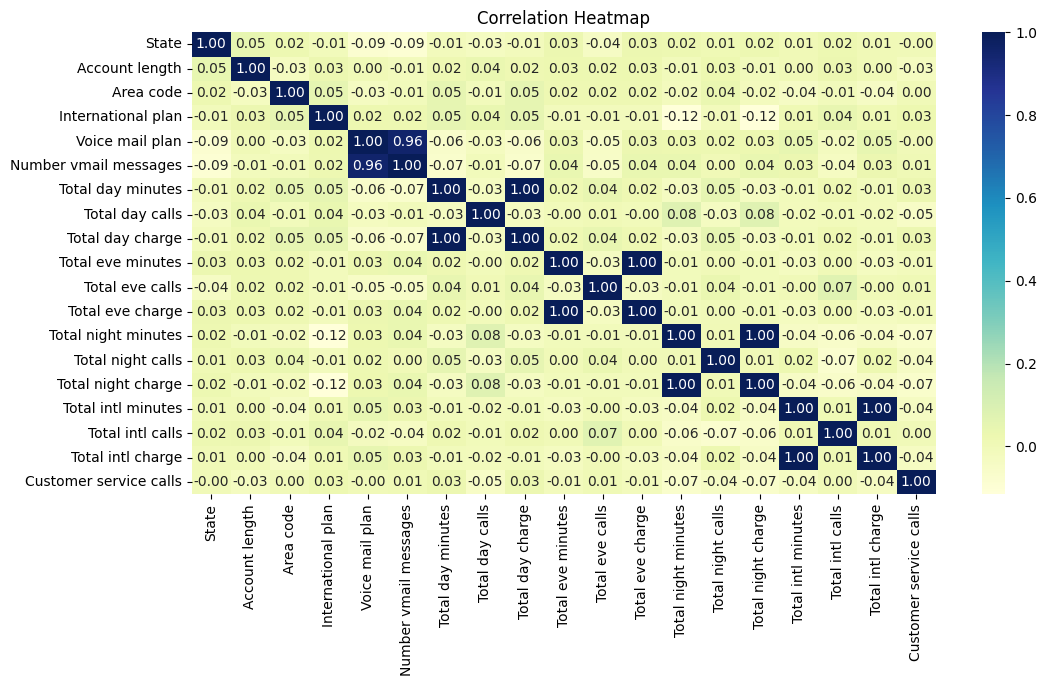

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Data Cleaning and Preprocessing

In [51]:
# Perform Label Encoding on categorical columns

df['State_cat'] = df['State'].astype('category').cat.codes
df['International_plan_cat'] = df['International plan'].astype('category').cat.codes
df['Voice_mail_plan_cat'] = df['Voice mail plan'].astype('category').cat.codes

# Check the encoded columns
df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_cat,International_plan_cat,Voice_mail_plan_cat
0,18,117,408,0,0,0,0.064036,97,0.064504,2.983872,...,90,0.323581,-0.548297,4,-0.547714,1,False,18,0,0
1,15,65,415,0,0,0,-0.934756,137,-0.934501,0.506113,...,111,0.185049,0.877350,6,0.877843,4,True,15,0,0
2,34,161,415,0,0,0,2.739500,67,2.739121,2.303545,...,128,-0.784675,-1.724455,9,-1.722480,4,True,34,0,0
3,40,111,415,0,0,0,-1.271894,103,-1.271744,-1.329563,...,105,-0.203735,-0.904709,6,-0.904104,2,False,40,0,0
4,11,49,510,0,0,0,-1.111438,117,-1.111607,0.236397,...,90,-0.422705,0.307091,1,0.310260,1,False,11,0,0


In [52]:
numerical_columns = df.select_dtypes(include=['float', 'uint8', 'uint16', 'uint32', 'uint64']).columns
categorical_columns = df.select_dtypes(include=['category','object']).columns

In [53]:
# Standardization
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [54]:
# Encoding categorical features
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [55]:
# Define Features (X) and Target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']


In [56]:
print(y.dtypes)
print(y.unique())

bool
[False  True]


In [57]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **CROSS VALIDATION**

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

encoded_data = df.copy()
label_encoders = {}

for column in ['State', 'International plan', 'Voice mail plan']:
    label_encoders[column] = LabelEncoder()
    encoded_data[column] = label_encoders[column].fit_transform(encoded_data[column])

X = encoded_data.drop(columns=['Churn'])
y = encoded_data['Churn']

rf_clf = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation accuracies: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")


Cross-validation accuracies: [0.90298507 0.90298507 0.93233083 0.88721805 0.93233083]
Mean accuracy: 0.9116


## <b> GridSearchCV

In [59]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoded_data = df.copy()
label_encoders = {}

for column in ['State', 'International plan', 'Voice mail plan']:
    label_encoders[column] = LabelEncoder()
    encoded_data[column] = label_encoders[column].fit_transform(encoded_data[column])

# Split features and target
X = encoded_data.drop(columns=['Churn'])
y = encoded_data['Churn']

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform Grid Search
grid_search.fit(X, y)

# Output best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print(f"Best accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best accuracy: 0.9161


# **LOGISTIC REGRESSION**

Logistic Regression Accuracy: 0.7761194029850746

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.81      0.86       115
        True       0.33      0.58      0.42        19

    accuracy                           0.78       134
   macro avg       0.63      0.69      0.64       134
weighted avg       0.84      0.78      0.80       134


Confusion Matrix:
 [[93 22]
 [ 8 11]]


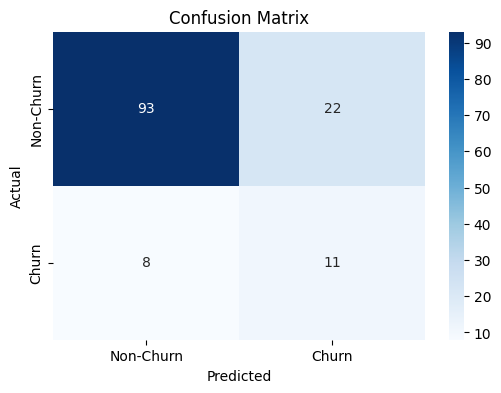

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **DECISION TREE**

Decision Tree Accuracy: 0.9104477611940298

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.96      0.95       115
        True       0.71      0.63      0.67        19

    accuracy                           0.91       134
   macro avg       0.82      0.79      0.81       134
weighted avg       0.91      0.91      0.91       134


Confusion Matrix:
 [[110   5]
 [  7  12]]


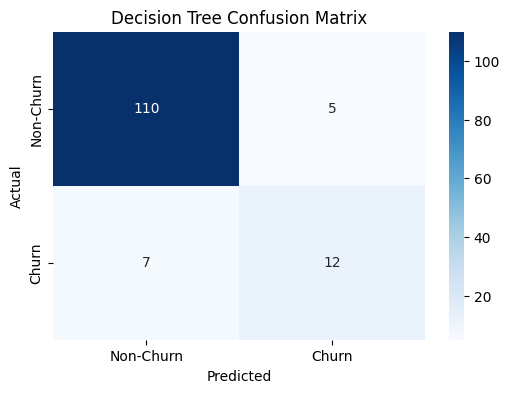

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# **RANDOM FOREST**

Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       115
        True       1.00      1.00      1.00        19

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134


Confusion Matrix:
 [[115   0]
 [  0  19]]


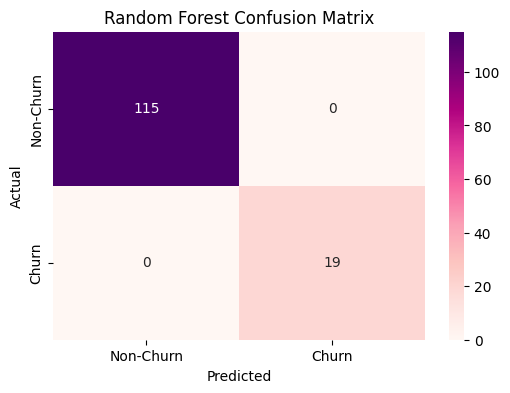

In [73]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)  # Apply SMOTE to features and target

# Train Random Forest on balanced data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_balanced, y_balanced)  # Train on the balanced data

# Predictions
y_pred = rf.predict(X_test)  # Predictions using the original test set

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu',
            xticklabels=['Non-Churn', 'Churn'],
            yticklabels=['Non-Churn', 'Churn'])

plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# **XGBOOST**

In [35]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_balanced, y_balanced)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       115
        True       1.00      1.00      1.00        19

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134


Confusion Matrix:
 [[115   0]
 [  0  19]]


# **ADABOOST**

In [36]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_balanced, y_balanced)

# Predictions
y_pred_ada = ada.predict(X_test)

# Evaluation
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))


AdaBoost Accuracy: 0.9029850746268657

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.91      0.94       115
        True       0.62      0.84      0.71        19

    accuracy                           0.90       134
   macro avg       0.79      0.88      0.83       134
weighted avg       0.92      0.90      0.91       134


Confusion Matrix:
 [[105  10]
 [  3  16]]


# **BAGGING CLASSIFIER**

In [37]:
from sklearn.ensemble import BaggingClassifier

# Train Bagging Classifier
bagging = BaggingClassifier(
    estimator=LogisticRegression(random_state=42),
    n_estimators=10,
    random_state=42
)
bagging.fit(X_balanced, y_balanced)

# Predictions
y_pred_bagging = bagging.predict(X_test)

# Evaluation
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bagging))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))

Bagging Classifier Accuracy: 0.7686567164179104

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.78      0.85       115
        True       0.34      0.68      0.46        19

    accuracy                           0.77       134
   macro avg       0.64      0.73      0.65       134
weighted avg       0.85      0.77      0.80       134


Confusion Matrix:
 [[90 25]
 [ 6 13]]


# **VOTING CLASSIFIER**

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define base models
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)

# Create Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf), ('svc', svc)], voting='soft'
)
voting_clf.fit(X_balanced, y_balanced)

# Predictions
y_pred_voting = voting_clf.predict(X_test)

# Evaluation
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.9701492537313433

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.97      0.98       115
        True       0.86      0.95      0.90        19

    accuracy                           0.97       134
   macro avg       0.92      0.96      0.94       134
weighted avg       0.97      0.97      0.97       134


Confusion Matrix:
 [[112   3]
 [  1  18]]


# **KNN**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_balanced, y_balanced)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.7761194029850746

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.74      0.85       115
        True       0.39      1.00      0.56        19

    accuracy                           0.78       134
   macro avg       0.69      0.87      0.70       134
weighted avg       0.91      0.78      0.81       134


Confusion Matrix:
 [[85 30]
 [ 0 19]]


# **SVM**

In [40]:
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC(kernel='rbf', random_state=42)  # 'rbf' kernel is commonly used; you can try 'linear' or 'poly'

# Train the model
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.8582089552238806

Classification Report:
               precision    recall  f1-score   support

       False       0.86      1.00      0.92       115
        True       0.00      0.00      0.00        19

    accuracy                           0.86       134
   macro avg       0.43      0.50      0.46       134
weighted avg       0.74      0.86      0.79       134


Confusion Matrix:
 [[115   0]
 [ 19   0]]


# **HYPER TUNING**

In [41]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_balanced, y_balanced)

# Get the best parameters and model
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       115
        True       1.00      1.00      1.00        19

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134


Confusion Matrix:
 [[115   0]
 [  0  19]]


## <b> KMeans Clustering

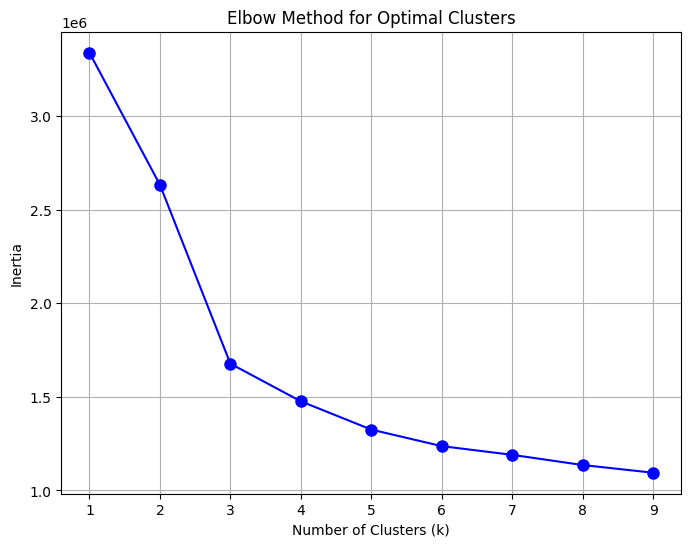

In [42]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_imputed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid()
plt.show()

Silhouette Score: 0.020756376839796392
Davies-Bouldin Index: 6.686774725232249


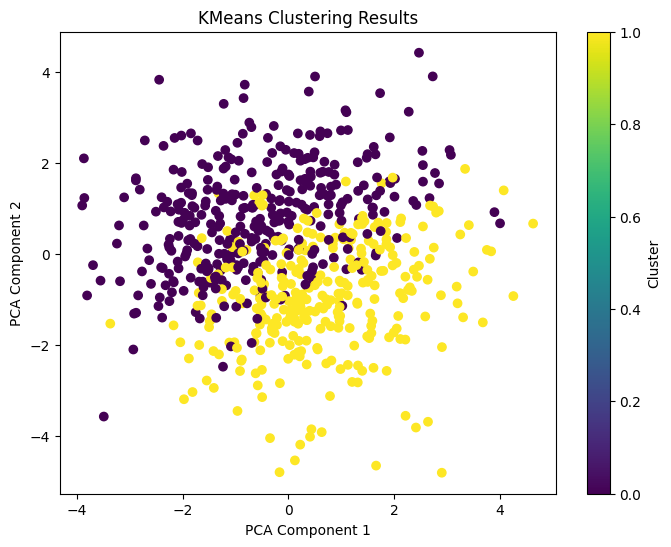

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

dataset = pd.read_csv('/content/churn-bigml-20.csv')
X = dataset.drop('Churn', axis=1)
categorical_columns = X.select_dtypes(include=['object', 'category']).columns

numeric_columns = X.select_dtypes(include=['number']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
sil_score = silhouette_score(X_scaled, kmeans_labels)
db_index = davies_bouldin_score(X_scaled, kmeans_labels)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Index:", db_index)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


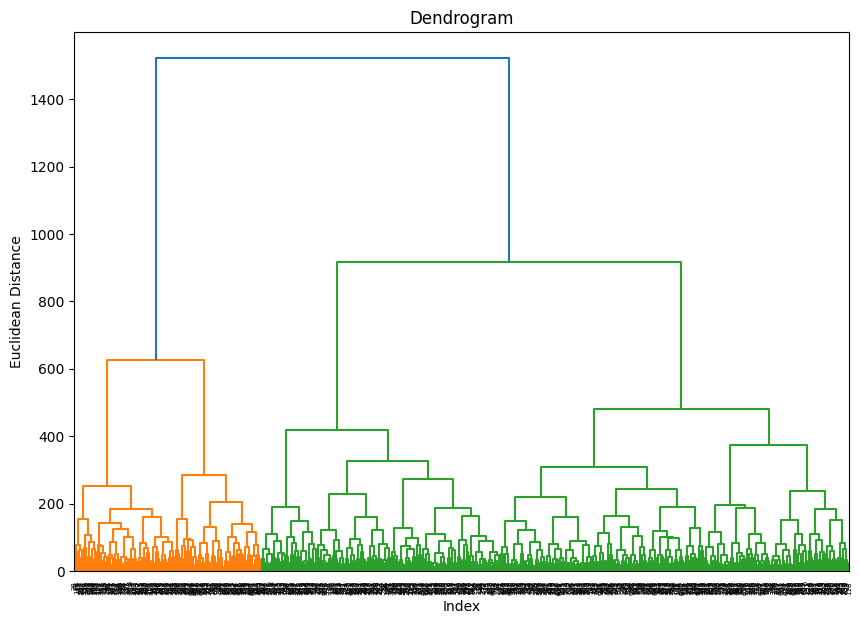

In [44]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['int64', 'float64'])
linked = sch.linkage(numeric_df, method='ward')
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, labels=numeric_df.index.tolist(), orientation='top')
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.show()

## <b>MODEL EVALUATION

--- Logistic Regression ---
              precision    recall  f1-score   support

       False       0.93      0.80      0.86       115
        True       0.34      0.63      0.44        19

    accuracy                           0.78       134
   macro avg       0.64      0.72      0.65       134
weighted avg       0.85      0.78      0.80       134



--- Decision Tree ---
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       115
        True       1.00      1.00      1.00        19

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134



--- Random Forest ---
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       115
        True       1.00      1.00      1.00        19

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       13

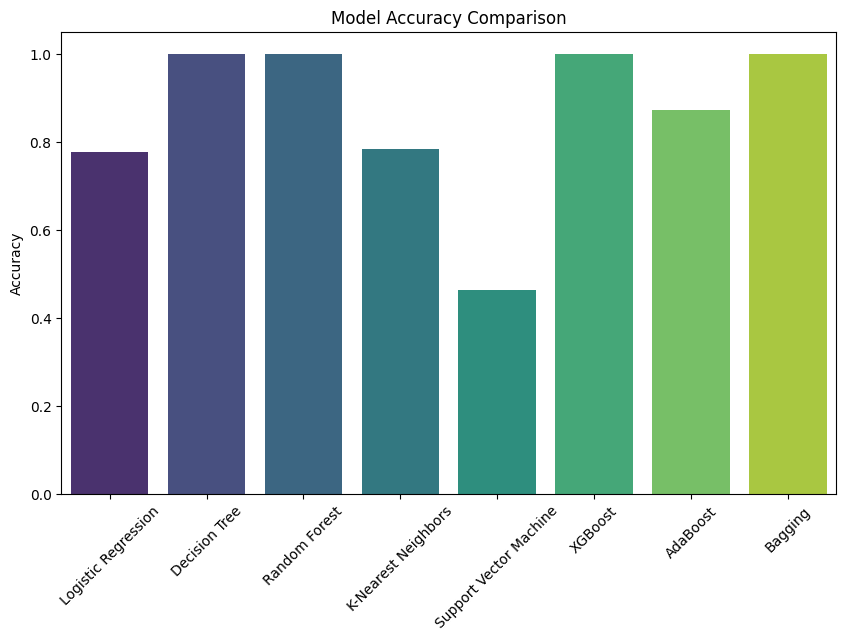

In [76]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier()
}


# Initialize lists to store results
accuracies = []
roc_auc_scores = []
models_names = []
classification_reports = []

# Fit models and evaluate
for name, model in models.items():
    model.fit(X_balanced, y_balanced)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    # Accuracy and ROC AUC
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    accuracies.append(accuracy)
    roc_auc_scores.append(roc_auc)
    models_names.append(name)

    # Print classification report for further insights
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    classification_reports.append(classification_report(y_test, y_pred, output_dict=True))

    print("\n")

# Plot Accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=models_names, y=accuracies , palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

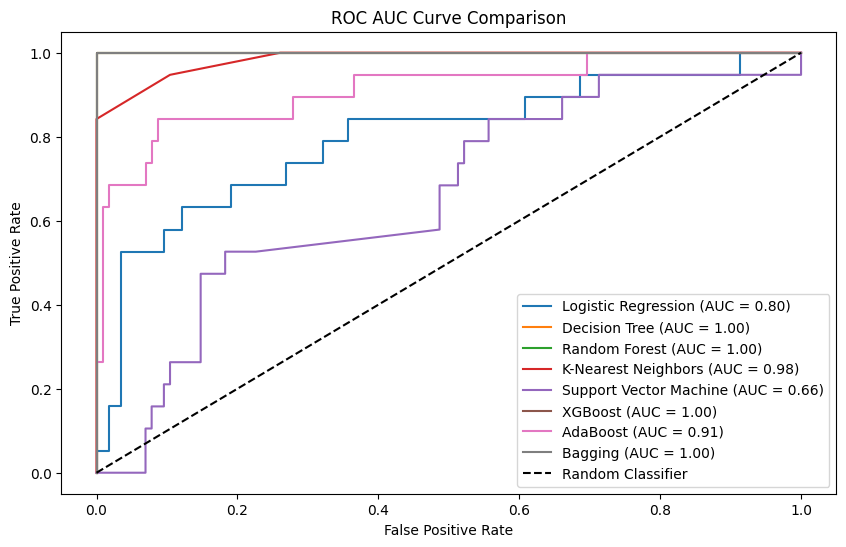

In [ ]:
# Plot ROC AUC Curves
plt.figure(figsize=(10, 6))
for i, (name, model) in enumerate(models.items()):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve Comparison')
plt.legend(loc='best')
plt.show()

In [ ]:
# Create Comparison Table for metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = []

for i, report in enumerate(classification_reports):
    accuracy = accuracies[i]
    precision = report['accuracy']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    metrics_values.append([accuracy, precision, recall, f1_score])

# Convert to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics_values, columns=metrics, index=models_names)
print(metrics_df)

                        Accuracy  Precision    Recall  F1-Score
Logistic Regression     0.791045   0.791045  0.746453  0.675320
Decision Tree           1.000000   1.000000  1.000000  1.000000
Random Forest           1.000000   1.000000  1.000000  1.000000
K-Nearest Neighbors     0.776119   0.776119  0.869565  0.704412
Support Vector Machine  0.477612   0.477612  0.629748  0.446019
XGBoost                 1.000000   1.000000  1.000000  1.000000
AdaBoost                0.902985   0.902985  0.877574  0.826408
Bagging                 1.000000   1.000000  1.000000  1.000000


In [ ]:
!mkdir churn-prediction
%cd churn-prediction


/content/churn-prediction


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Function to Load Data
@st.cache(allow_output_mutation=True)
def load_data():
    return pd.read_csv('churn-bigml-20.csv')  # Replace with your dataset file

# Function to Train and Save the Model
def train_and_evaluate_model(df):
    # Preprocessing and splitting
    X = df.drop(['Churn', 'State'], axis=1)
    y = df['Churn']

    categorical_features = ['International plan', 'Voice mail plan']
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
                      ('num', 'passthrough', numerical_features)]
    )

    X_preprocessed = preprocessor.fit_transform(X)

    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X_preprocessed, y)

    X_train, X_test, y_train, y_test = train_test_split(
        X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
    )

    # Train the model
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    joblib.dump(pipeline, 'churn_model.pkl')

    # Predictions and evaluation
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=False)  # Fixed this line
    confusion = confusion_matrix(y_test, y_pred)

    return accuracy, report, confusion

# Function to Load the Trained Model
@st.cache(allow_output_mutation=True)
def load_model():
    return joblib.load('churn_model.pkl')

# Streamlit Web Interface
st.title("Customer Churn Prediction")

# Step 1: Load Data
df = load_data()
st.subheader("Dataset Preview")
st.write(df.head())

# Step 2: Visualize Data
st.write("### Churn Distribution")
fig, ax = plt.subplots()
sns.countplot(x='Churn', data=df, ax=ax)
ax.set_title("Churn vs Non-Churn Customers")
st.pyplot(fig)

# Step 3: Train the Model
st.subheader("Model Training")
if st.button("Train Model"):
    try:
        with st.spinner("Training model..."):
            accuracy, report, confusion = train_and_evaluate_model(df)
        st.success(f"Model Trained Successfully! Accuracy: {accuracy:.2f}")
        st.text("Classification Report:")
        st.text(report)
        st.text("Confusion Matrix:")
        st.write(confusion)
    except ValueError as e:
        st.error(str(e))  # Display error if there's a class imbalance

# Step 4: Load the Trained Model
model = None
try:
    model = load_model()
except:
    st.warning("Please train the model first by clicking the 'Train Model' button.")

# Step 5: Make Predictions
st.subheader("Make a Prediction")
if model:
    # Collect user input for prediction
    account_length = st.number_input('Account Length', min_value=0, value=100)
    area_code = st.selectbox('Area Code', df['Area code'].unique())
    intl_plan = st.selectbox('International Plan', ['No', 'Yes'])
    voice_mail_plan = st.selectbox('Voice Mail Plan', ['No', 'Yes'])
    num_vmail_messages = st.number_input('Number of Voicemail Messages', min_value=0, value=0)
    total_day_minutes = st.number_input('Total Day Minutes', min_value=0.0, value=180.0)
    total_day_calls = st.number_input('Total Day Calls', min_value=0, value=100)
    total_day_charge = st.number_input('Total Day Charge', min_value=0.0, value=30.0)
    total_eve_minutes = st.number_input('Total Evening Minutes', min_value=0.0, value=200.0)
    total_eve_calls = st.number_input('Total Evening Calls', min_value=0, value=100)
    total_eve_charge = st.number_input('Total Evening Charge', min_value=0.0, value=20.0)
    total_night_minutes = st.number_input('Total Night Minutes', min_value=0.0, value=200.0)
    total_night_calls = st.number_input('Total Night Calls', min_value=0, value=100)
    total_night_charge = st.number_input('Total Night Charge', min_value=0.0, value=10.0)
    total_intl_minutes = st.number_input('Total International Minutes', min_value=0.0, value=10.0)
    total_intl_calls = st.number_input('Total International Calls', min_value=0, value=5)
    total_intl_charge = st.number_input('Total International Charge', min_value=0.0, value=2.0)
    customer_service_calls = st.number_input('Customer Service Calls', min_value=0, value=1)

    if st.button("Predict Churn"):
        # Prepare input data for prediction
        input_data = pd.DataFrame({
            'Account length': [account_length],
            'Area code': [area_code],
            'International plan': [intl_plan],
            'Voice mail plan': [voice_mail_plan],
            'Number vmail messages': [num_vmail_messages],
            'Total day minutes': [total_day_minutes],
            'Total day calls': [total_day_calls],
            'Total day charge': [total_day_charge],
            'Total eve minutes': [total_eve_minutes],
            'Total eve calls': [total_eve_calls],
            'Total eve charge': [total_eve_charge],
            'Total night minutes': [total_night_minutes],
            'Total night calls': [total_night_calls],
            'Total night charge': [total_night_charge],
            'Total intl minutes': [total_intl_minutes],
            'Total intl calls': [total_intl_calls],
            'Total intl charge': [total_intl_charge],
            'Customer service calls': [customer_service_calls]
        })

        try:
            # Use the trained pipeline to transform and predict
            prediction = model.predict(input_data)[0]
            prediction_proba = model.predict_proba(input_data)[0][1]

            # Display result
            if prediction == 1:
                st.error(f"**Customer is likely to churn!** (Probability: {prediction_proba:.2f})")
            else:
                st.success(f"**Customer is not likely to churn.** (Probability: {1 - prediction_proba:.2f})")
        except Exception as e:
            st.error(f"Error during prediction: {e}")


Overwriting app.py


In [ ]:
from google.colab import files
uploaded = files.upload()  # Select `online_payment_fraud.csv` from your local machine


Saving churn-bigml-20.csv to churn-bigml-20 (9).csv


In [ ]:
!rm requirements.txt



rm: cannot remove 'requirements.txt': No such file or directory


In [ ]:
%%writefile requirements.txt
pandas
numpy
matplotlib
seaborn
scikit-learn
imbalanced-learn
xgboost
tabulate
streamlit
joblib
imblearn


Writing requirements.txt


In [ ]:
!cat requirements.txt


pandas
numpy
matplotlib
seaborn
scikit-learn
imbalanced-learn
xgboost
tabulate
streamlit
joblib
imblearn


In [ ]:
!pip install -r requirements.txt


In [ ]:
from google.colab import files

# Download app.py
files.download('app.py')

# Download requirements.txt
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('/content/churn-bigml-20.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>